In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' # 예시: 맑은 고딕으로 설정 (Windows 환경 시)
plt.rcParams['axes.unicode_minus'] = False

In [95]:
df = pd.read_csv("건강데이터_2022_2023_합본.csv")

In [45]:
df['LS_VEG1'].value_counts()

LS_VEG1
2.0     5685
1.0     5482
3.0     1234
5.0      121
4.0       80
6.0       13
7.0        4
9.0        4
99.0       4
8.0        2
Name: count, dtype: int64

In [42]:
df['BE5_1'].value_counts()

BE5_1
1.0    7830
8.0    1234
6.0    1045
9.0     951
4.0     708
3.0     662
2.0     450
5.0     305
Name: count, dtype: int64

In [53]:
df['BE3_31'].value_counts()

BE3_31
8.0     3203
88.0    1959
1.0     1592
6.0     1317
4.0     1216
99.0     965
3.0      955
5.0      849
7.0      565
2.0      564
Name: count, dtype: int64

In [46]:
df['BD1_11'].value_counts()

BD1_11
8.0    3090
4.0    2294
2.0    2199
1.0    2086
5.0    1503
3.0    1172
6.0     644
9.0     197
Name: count, dtype: int64

In [47]:
df['BS3_2'].value_counts()

BS3_2
888.0    11271
20.0       411
10.0       410
999.0      210
15.0       205
5.0        125
3.0         62
7.0         61
2.0         57
1.0         50
30.0        46
12.0        45
8.0         45
4.0         42
6.0         32
13.0        22
40.0        17
25.0        15
14.0        11
9.0         10
17.0         9
18.0         9
16.0         8
11.0         3
50.0         3
45.0         2
35.0         1
19.0         1
60.0         1
26.0         1
Name: count, dtype: int64

전처리 

In [122]:
df['BE5_1'] = df['BE5_1'].astype(str).str.strip().replace({ #1주일간 근력운동 일수
'1.0' : 0,
'2.0' : 1,
'3.0' : 2,
'4.0' : 3,
'5.0' : 4,
'6.0' : 5,
'8.0' : 0,
'9.0' : np.nan,
'nan' : np.nan
 })
df['BE5_1'] = pd.to_numeric(df['BE5_1'], errors='coerce')

In [123]:
df['LS_VEG1'] = df['LS_VEG1'].astype(str).str.strip().replace({  #최근 1년 동안 평균 채소류(김치 및 장아찌 제외), 버섯류, 해조류 섭취 빈도
'1.0' : 1095,
'2.0' : 730,
'3.0' : 365,
'4.0' : 286,
'5.0' : 156,
'6.0' : 52,
'7.0' : 30,
'8.0' : 12,
'9.0' : 6,
'99.0': np.nan,
'nan' : np.nan
})
df['LS_VEG1'] = pd.to_numeric(df['LS_VEG1'], errors='coerce')

In [113]:
# 일반 담배 하루 평균 흡연량 처리
df['BS3_2'] = df['BS3_2'].replace(888, 0)

# 전자 담배 하루 평균 흡연량 처리
df['BS12_47_1'] = df['BS12_47_1'].replace({888: 0, 999: np.nan}) 

# 합치기 전 숫자형으로 변환
df['BS3_2'] = pd.to_numeric(df['BS3_2'], errors='coerce')
df['BS12_47_1'] = pd.to_numeric(df['BS12_47_1'], errors='coerce')

# 두 변수 합산 (NaN은 무시하고 합함)
df['tobacco'] = df[['BS3_2', 'BS12_47_1']].sum(axis=1, skipna=True)


In [124]:
df['BD1_11'] = df['BD1_11'].astype(str).str.strip().replace({ #1년간 음주빈도
'1.0' : 0,
'2.0' : 6,
'3.0' : 12,
'4.0' : 42,
'5.0' : 130,
'6.0' : 286,
'8.0' : 0,
'9.0' : np.nan,
'nan' : np.nan
})
df['BD1_11'] = pd.to_numeric(df['BD1_11'], errors='coerce')

In [117]:
set(df_clustering['LS_VEG1'])

{'1095', '12', '156', '286', '30', '365', '52', '6', '730'}

In [100]:
df.columns

Index(['ID', 'year', 'region', 'town_t', 'sex', 'age', 'incm', 'ho_incm',
       'edu', 'occp', 'cfam', 'genertn', 'D_1_1', 'DI1_dg', 'DI1_ag', 'DI1_pr',
       'DI1_pt', 'DI1_2', 'DI2_dg', 'DI2_ag', 'DI2_pr', 'DI2_pt', 'DI2_2',
       'DE1_dg', 'DE1_ag', 'DE1_pr', 'DE1_pt', 'DE1_3', 'DE1_31', 'DE1_32',
       'DE1_33', 'DE1_34', 'DE1_4', 'DN1_dg', 'DN1_ag', 'BH1', 'BO1', 'BO1_1',
       'BO2_1', 'BD1', 'BD1_11', 'BD2_1', 'BP16_1', 'BP16_2', 'BP1', 'BP5',
       'BS1_1', 'BS3_1', 'BS3_2', 'BS12_37', 'BS12_47', 'BS12_47_1', 'BS12_1',
       'BS12_2', 'BE3_31', 'BE3_32', 'BE3_33', 'BE5_1', 'BE9', 'HE_fh',
       'HE_HPfh1', 'HE_HPfh2', 'HE_HLfh1', 'HE_HLfh2', 'HE_DMfh1', 'HE_DMfh2',
       'HE_sbp1', 'HE_dbp1', 'HE_sbp2', 'HE_dbp2', 'HE_HP', 'HE_ht', 'HE_wt',
       'HE_wc', 'HE_BMI', 'HE_obe', 'HE_glu', 'HE_HbA1c', 'HE_DM_HbA1c',
       'HE_chol', 'HE_HDL_st2', 'HE_TG', 'HE_LDL_drct', 'HE_HCHOL', 'HE_HTG',
       'HE_ast', 'HE_alt', 'HE_BUN', 'HE_crea', 'HE_Upro', 'HE_Ucrea',
       'HE

고혈압 

In [ ]:
# HE_HP 결측치 행 제거
df_clustering = df.dropna(subset=['HE_HP'])

columns_to_drop = ['occp', 'HE_Ualb', 'HE_HTG', 'HE_HCHOL', 'HE_fh', 'HE_DMfh1', 'HE_DMfh2',
                   'HE_HPfh1', 'HE_HPfh2', 'HE_HLfh1', 'HE_HLfh2']
df_clustering = df_clustering.drop(columns=columns_to_drop, errors='ignore')

low_missing_columns = [
    'BE5_1','BD1_11', 'LS_VEG1', 'tobacco'
]

In [126]:
# 이전에 low_missing_columns, df_clustering가 정의되었다고 가정합니다.

low_missing_columns = [
 'BE5_1','BD1_11', 'LS_VEG1', 'tobacco'
]

print("--- Checking and filling NaNs ---")
print("Initial NaN count for specified columns:")
print(df_clustering[low_missing_columns].isnull().sum())
print("-" * 30)

# NaN을 각 컬럼의 최빈값으로 df_clustering에서 대체
for col in low_missing_columns:
    print(f"\nProcessing column: '{col}'")
    if col not in df_clustering.columns:
        print(f"Warning: Column '{col}' not found in the DataFrame.")
        continue # 다음 컬럼으로 넘어감

    initial_nan_count = df_clustering[col].isnull().sum()
    print(f"  NaN count before filling: {initial_nan_count}")

    mode_value = df_clustering[col].mode(dropna=True)

    if not mode_value.empty:
        fill_value = mode_value[0]
        print(f"  Calculated mode value: {fill_value} (Type: {type(fill_value)})")

        # 실제로 NaN이 있는 경우에만 fillna 시도
        if initial_nan_count > 0:
             df_clustering[col].fillna(fill_value, inplace=True)
             print(f"  Filled {initial_nan_count} NaN values with {fill_value}.")
        else:
             print(f"  No NaN values found to fill in '{col}'.")

        final_nan_count = df_clustering[col].isnull().sum()
        print(f"  NaN count after filling: {final_nan_count}")

        # 만약 final_nan_count가 0이 아니라면, 채워지지 않은 NaN이 있다는 뜻
        if final_nan_count > 0:
            print(f"  Note: {final_nan_count} NaN values remain in '{col}'. They might not be standard np.nan.")

    else:
        print(f"  Could not determine mode for '{col}' (column might be all NaNs or empty after dropna). No filling performed.")
        print(f"  NaN count after check: {df_clustering[col].isnull().sum()}")


print("\n--- Filling process finished ---")
print("Final NaN count for specified columns:")
print(df_clustering[low_missing_columns].isnull().sum())

# 추가 확인: NaN이 아닌 다른 형태의 누락된 값 확인 (예: 빈 문자열 '')
print("\n--- Checking for other potential missing value representations ---")
for col in low_missing_columns:
     if df_clustering[col].dtype == 'object': # 문자열 타입 컬럼인 경우
         print(f"Checking column '{col}' (object dtype):")
         # 빈 문자열 또는 'NA' 등 의심스러운 값의 개수를 세어봅니다.
         print(f"  Count of empty strings (''): {df_clustering[col].eq('').sum()}")
         # 다른 일반적이지 않은 값들을 value_counts로 확인
         print("  Top values (including non-standard):")
         print(df_clustering[col].value_counts(dropna=False).head()) # dropna=False 포함

--- Checking and filling NaNs ---
Initial NaN count for specified columns:
BE5_1      847
BD1_11     160
LS_VEG1    421
tobacco      0
dtype: int64
------------------------------

Processing column: 'BE5_1'
  NaN count before filling: 847
  Calculated mode value: 0.0 (Type: <class 'numpy.float64'>)
  Filled 847 NaN values with 0.0.
  NaN count after filling: 0

Processing column: 'BD1_11'
  NaN count before filling: 160
  Calculated mode value: 0.0 (Type: <class 'numpy.float64'>)
  Filled 160 NaN values with 0.0.
  NaN count after filling: 0

Processing column: 'LS_VEG1'
  NaN count before filling: 421
  Calculated mode value: 730.0 (Type: <class 'numpy.float64'>)
  Filled 421 NaN values with 730.0.
  NaN count after filling: 0

Processing column: 'tobacco'
  NaN count before filling: 0
  Calculated mode value: 0.0 (Type: <class 'numpy.float64'>)
  No NaN values found to fill in 'tobacco'.
  NaN count after filling: 0

--- Filling process finished ---
Final NaN count for specified colu

In [127]:


            
knn_columns = [
    'HE_sbp1', 'HE_dbp1', 'HE_wc', 'HE_glu',
    'HE_chol', 'HE_HDL_st2', 'HE_LDL_drct', 'HE_crea',
    'HE_ast', 'HE_alt', 'HE_wt', 'HE_ht', 'HE_BMI'
]

from sklearn.impute import KNNImputer

# HE_HP별로 데이터 분리 및 KNN Imputation
for hp_value in [1, 2, 3, 4]:
    # HE_HP 값에 해당하는 데이터 추출
    hp_df = df_clustering[df_clustering['HE_HP'] == hp_value][knn_columns].copy()
    if not hp_df.empty:
        # 비해당/모름 값 NaN으로 변환
        hp_df = hp_df.replace([888, 999], np.nan)
        # KNN Imputation
        imputer = KNNImputer(n_neighbors=5, weights="uniform")
        hp_imputed = imputer.fit_transform(hp_df)
        hp_imputed_df = pd.DataFrame(hp_imputed, columns=knn_columns, index=hp_df.index)
        # 원본 데이터에 반영
        df_clustering.loc[hp_df.index, knn_columns] = hp_imputed_df


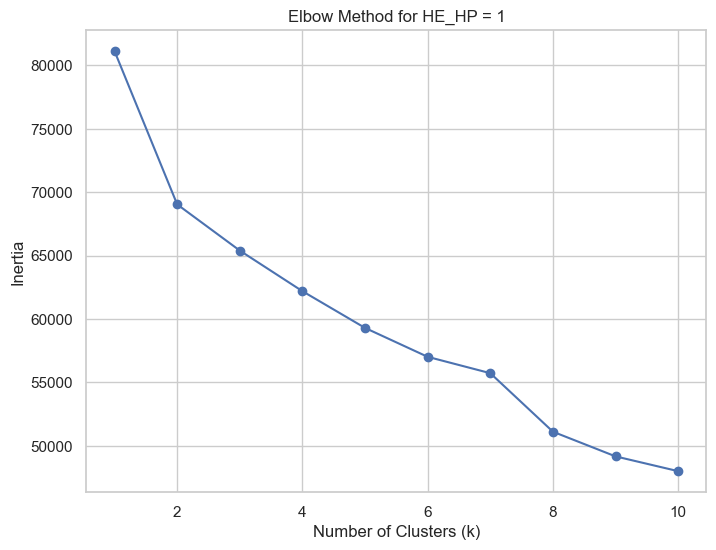

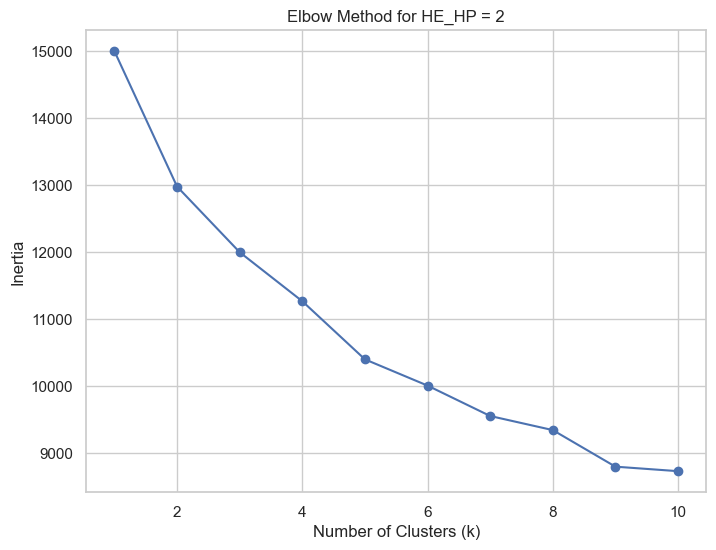

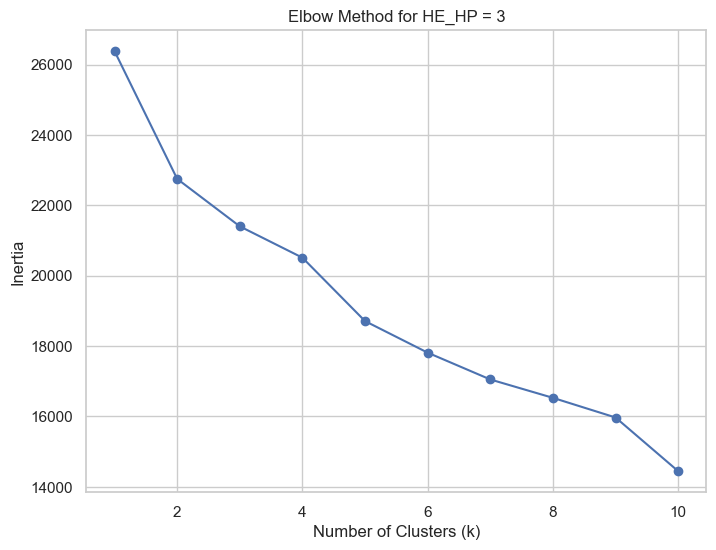

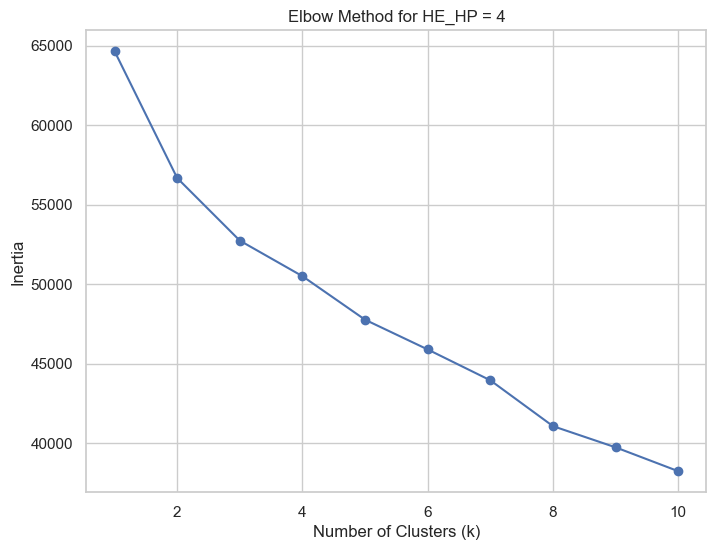

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 피처 표준화
scaler = StandardScaler()

# 클러스터 수 범위 설정 (예: 1~10)
k_range = range(1, 11)

# 결과를 저장할 데이터프레임 준비
df_clustering['Cluster'] = np.nan

selected_cols = knn_columns + ["BD1_11","tobacco","BE5_1","LS_VEG1"]

for hp_value in [1, 2, 3, 4]:
    # HE_HP 값에 해당하는 데이터 추출
    hp_df = df_clustering[df_clustering['HE_HP'] == hp_value][selected_cols].copy()

    if not hp_df.empty:
        # 데이터 표준화
        scaled_df = scaler.fit_transform(hp_df)

        # 엘보우 방법: 각 k에 대해 관성(Inertia) 계산
        inertias = []
        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(scaled_df)
            inertias.append(kmeans.inertia_)

        # 엘보우 플롯 시각화
        plt.figure(figsize=(8, 6))
        plt.plot(k_range, inertias, marker='o')
        plt.title(f'Elbow Method for HE_HP = {hp_value}')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Inertia')
        plt.grid(True)
        plt.show()

        # 최적 k 선택 (예: 관성 감소율 기반)
        # 여기서는 수동으로 플롯을 보고 k를 선택하거나, 자동화된 방법을 사용할 수 있음
        # 예: 관성 감소율이 완만해지는 k를 선택 (임시로 k=3으로 설정, 실제로는 플롯 확인 후 결정)
        optimal_k = 3  # TODO: 엘보우 플롯을 보고 직접 선택하거나 자동화 필요

        # 최적 k로 K-means 군집화 수행
        kmeans = KMeans(n_clusters=optimal_k, random_state=42)
        clusters = kmeans.fit_predict(scaled_df)

        # 클러스터 결과 저장
        df_clustering.loc[hp_df.index, 'Cluster'] = clusters


--- Processing HE_HP = 1 with k = 2 ---
Silhouette Score for HE_HP = 1 (k=2): 0.1755
Cluster Characteristics (Mean values for HE_HP = 1, k=2):
             수축기 혈압 (최고 혈압)  이완기 혈압 (최저 혈압)       허리둘레          혈당  \
New_Cluster                                                          
0                113.576638       71.196617  87.951268  100.322516   
1                106.480903       67.521875  73.478840   92.011806   

                총 콜레스테롤  HDL 콜레스테롤 (좋은 콜레스테롤)  LDL 콜레스테롤 (나쁜 콜레스테롤)  \
New_Cluster                                                           
0            189.080127             51.775159            119.854545   
1            191.255347             66.407847            115.090417   

             크레아티닌 (신장 기능 지표)  AST (간 기능 검사, GOT)  ALT (간 기능 검사, GPT)  \
New_Cluster                                                             
0                    0.855444           23.500740           25.369662   
1                    0.691277           18.878333           14.795000  

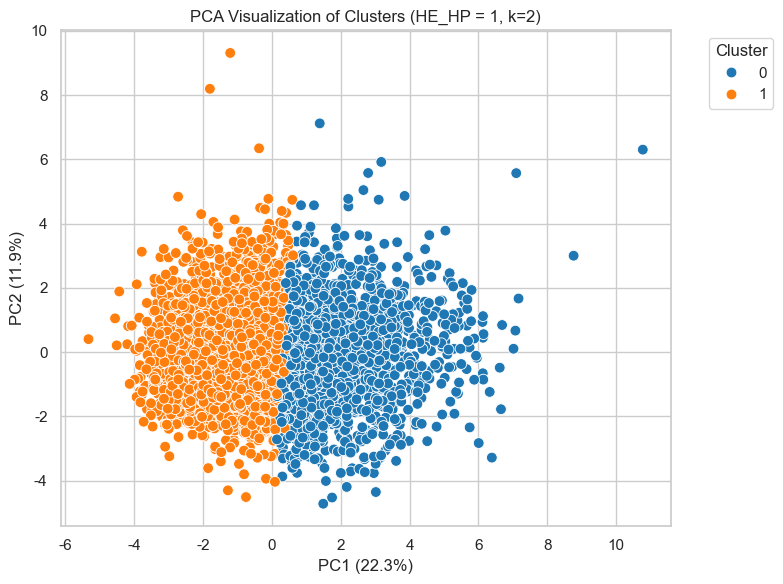


--- Processing HE_HP = 2 with k = 3 ---
Silhouette Score for HE_HP = 2 (k=3): 0.1096
Cluster Characteristics (Mean values for HE_HP = 2, k=3):
             수축기 혈압 (최고 혈압)  이완기 혈압 (최저 혈압)       허리둘레          혈당  \
New_Cluster                                                          
0                125.354396       74.854396  81.294670   98.493956   
1                126.144172       74.334356  84.720859  104.259509   
2                127.286458       76.682292  98.406458  104.423958   

                총 콜레스테롤  HDL 콜레스테롤 (좋은 콜레스테롤)  LDL 콜레스테롤 (나쁜 콜레스테롤)  \
New_Cluster                                                           
0            204.242308             61.306044            128.012637   
1            163.580982             50.774847             96.742945   
2            212.283333             47.457292            142.580208   

             크레아티닌 (신장 기능 지표)  AST (간 기능 검사, GOT)  ALT (간 기능 검사, GPT)  \
New_Cluster                                                             
0  

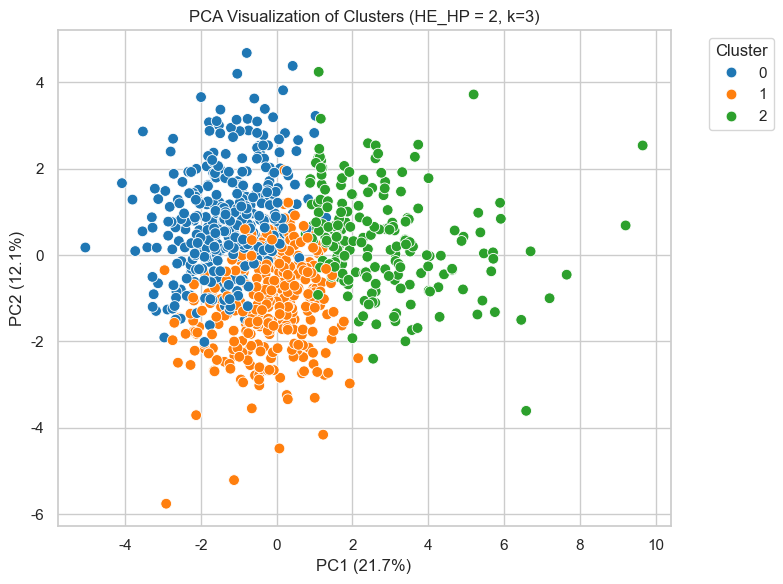


--- Processing HE_HP = 3 with k = 2 ---
Silhouette Score for HE_HP = 3 (k=2): 0.1473
Cluster Characteristics (Mean values for HE_HP = 3, k=2):
             수축기 혈압 (최고 혈압)  이완기 혈압 (최저 혈압)       허리둘레          혈당  \
New_Cluster                                                          
0                129.892655       84.204802  93.703983  105.678249   
1                129.080569       81.686019  79.880616   98.980095   

                총 콜레스테롤  HDL 콜레스테롤 (좋은 콜레스테롤)  LDL 콜레스테롤 (나쁜 콜레스테롤)  \
New_Cluster                                                           
0            203.543503             48.430791            129.858475   
1            194.271090             61.167062            118.475355   

             크레아티닌 (신장 기능 지표)  AST (간 기능 검사, GOT)  ALT (간 기능 검사, GPT)  \
New_Cluster                                                             
0                    0.898136           26.474859           33.250565   
1                    0.738678           22.303791           18.866825  

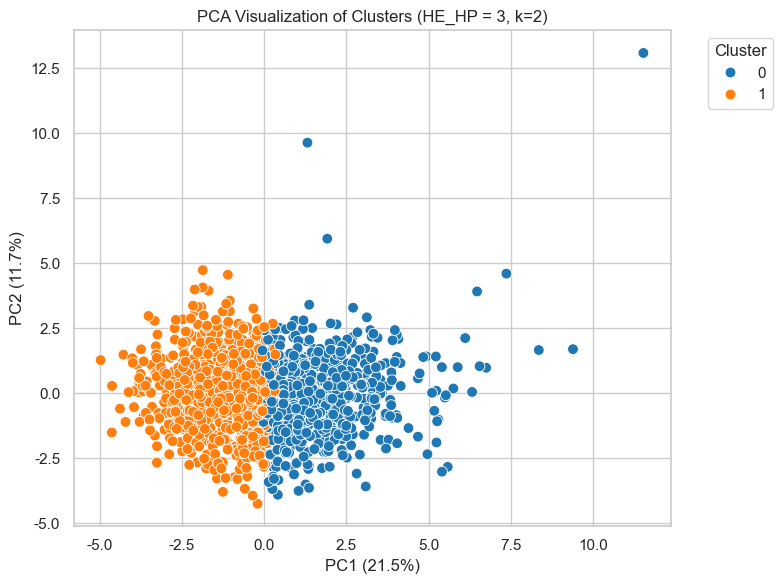


--- Processing HE_HP = 4 with k = 3 ---
Silhouette Score for HE_HP = 4 (k=3): 0.1015
Cluster Characteristics (Mean values for HE_HP = 4, k=3):
             수축기 혈압 (최고 혈압)  이완기 혈압 (최저 혈압)       허리둘레          혈당  \
New_Cluster                                                          
0                132.743194       81.743194  98.198149  115.222868   
1                145.061187       86.830137  84.116110  102.480548   
2                128.031133       73.663138  85.156314  107.647696   

                총 콜레스테롤  HDL 콜레스테롤 (좋은 콜레스테롤)  LDL 콜레스테롤 (나쁜 콜레스테롤)  \
New_Cluster                                                           
0            171.152269             48.196733             99.286751   
1            213.278904             60.473059            135.119269   
2            151.255915             54.340847             80.785305   

             크레아티닌 (신장 기능 지표)  AST (간 기능 검사, GOT)  ALT (간 기능 검사, GPT)  \
New_Cluster                                                             
0  

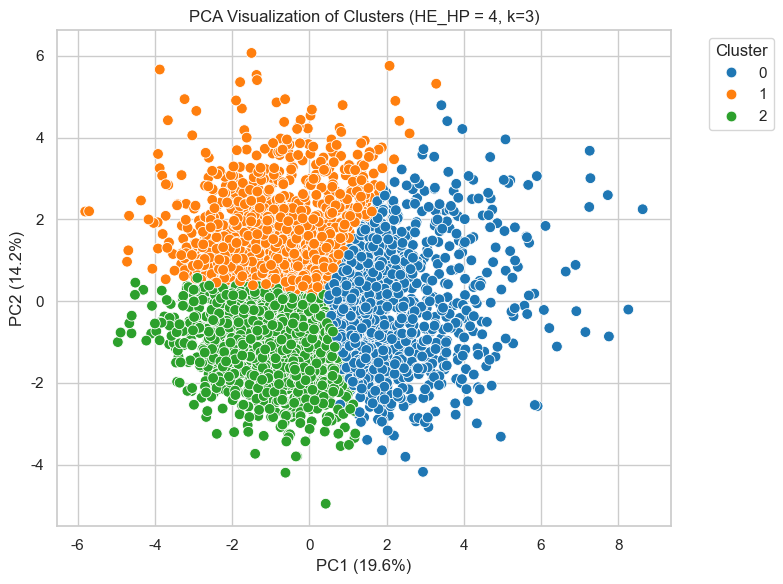

In [129]:
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd # pandas 필요
import matplotlib.pyplot as plt # matplotlib 필요
from sklearn.cluster import KMeans # KMeans 필요
# Assume df_clustering, selected_cols, scaler are defined and initialized before this snippet
from sklearn.metrics import silhouette_score


# 매핑 딕셔너리 정의 (피처 이름 -> 한글 설명)
feature_korean_names = {
    'HE_sbp1': '수축기 혈압 (최고 혈압)',
    'HE_dbp1': '이완기 혈압 (최저 혈압)',
    'HE_wc': '허리둘레',
    'HE_glu': '혈당',
    'HE_chol': '총 콜레스테롤',
    'HE_HDL_st2': 'HDL 콜레스테롤 (좋은 콜레스테롤)',
    'HE_LDL_drct': 'LDL 콜레스테롤 (나쁜 콜레스테롤)',
    'HE_crea': '크레아티닌 (신장 기능 지표)',
    'HE_ast': 'AST (간 기능 검사, GOT)',
    'HE_alt': 'ALT (간 기능 검사, GPT)',
    'HE_wt': '체중',
    'HE_ht': '키',
    'HE_BMI': '체질량 지수 (BMI)',
    'BD1_11': '1년 간 음주 빈도',
    'tobacco': '하루평균 흡연량',
    'BE5_1' : '1주일 간 운동 횟수',
    'LS_VEG1': '1년 동안 평균 채소류 섭취 빈도'
}

# 시각화용 설정
sns.set(style="whitegrid")

# HE_HP 별로 반복
for hp_value, optimal_k in zip([1, 2, 3, 4], [2, 3, 2, 3]):
    print(f"\n--- Processing HE_HP = {hp_value} with k = {optimal_k} ---")

    # 해당 그룹 데이터 추출
    # selected_cols는 이전에 정의되어 있어야 함 (예: selected_cols = ['HE_sbp1', '...', 'LS_VEG1'])
    # df_clustering는 이전에 로드/처리되어 있어야 함
    # scaler는 이전에 fit 되어 있어야 함
    hp_df = df_clustering[df_clustering['HE_HP'] == hp_value][selected_cols].copy()
    # 이 변수는 현재 코드 플로우에서 직접 사용되지 않습니다. (기존 클러스터 라벨)
    # cluster_labels = df_clustering[df_clustering['HE_HP'] == hp_value]['Cluster']


    if not hp_df.empty:
        # 표준화
        scaled_df = scaler.fit_transform(hp_df)

        # ====== 여기에서 optimal_k 값을 사용하여 클러스터링 수행 ======
        # K-Means 예시
        # n_init='auto' 또는 숫자로 지정 (최신 sklearn 버전 권장)
        kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
        new_cluster_labels = kmeans.fit_predict(scaled_df)
        # =======================================================
        kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
        new_cluster_labels = kmeans.fit_predict(scaled_df)
        # =======================================================
        if optimal_k > 1 and scaled_df.shape[0] > 1: # 데이터 포인트가 1개보다 많아야 계산 가능
                silhouette_avg = silhouette_score(scaled_df, new_cluster_labels)
                print(f"Silhouette Score for HE_HP = {hp_value} (k={optimal_k}): {silhouette_avg:.4f}")
        else:
            if optimal_k <= 1:
                print(f"Silhouette Score cannot be calculated for k = {optimal_k} (must be > 1).")
            else: # scaled_df.shape[0] <= 1
                 print(f"Silhouette Score cannot be calculated for HE_HP = {hp_value}: Insufficient data points ({scaled_df.shape[0]}).")

        # 군집별 특징 계산 및 출력
        # 1. 원본 데이터프레임에 새로 생성된 클러스터 라벨 추가
        # 인덱스가 맞아야 함 (위에서 같은 필터링 기준으로 슬라이싱했으므로 일치한다고 가정)
        hp_df_with_labels = hp_df.copy() # 원본 hp_df 변경 방지를 위해 복사
        hp_df_with_labels['New_Cluster'] = new_cluster_labels

        # 2. 'New_Cluster' 기준으로 그룹화하고 각 피처의 평균 계산
        cluster_characteristics = hp_df_with_labels.groupby('New_Cluster')[selected_cols].mean()

        # 3. 결과 출력을 위해 컬럼 이름을 한글로 변경
        # selected_cols에 포함된 피처 이름만 매핑 (딕셔너리에 없는 컬럼은 원래 이름 유지)
        cols_to_rename = {col: feature_korean_names.get(col, col) for col in cluster_characteristics.columns}
        cluster_characteristics = cluster_characteristics.rename(columns=cols_to_rename)

        # 4. 결과 출력
        print(f"Cluster Characteristics (Mean values for HE_HP = {hp_value}, k={optimal_k}):")
        print(cluster_characteristics)
        print("-" * 60) # 구분선

        # 클러스터 라벨 변수 이름을 new_cluster_labels로 변경 (혼동 방지)
        cluster_labels_for_pca = new_cluster_labels

        # PCA 2차원 축소
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(scaled_df)

        # 결과를 데이터프레임으로 변환
        pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
        # 새로 생성된 클러스터 라벨 사용
        pca_df['Cluster'] = cluster_labels_for_pca.astype(int)

        # 시각화 (나머지 코드 동일) - PCA 플롯의 축 이름은 PC1, PC2로 유지
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60)
        plt.title(f'PCA Visualization of Clusters (HE_HP = {hp_value}, k={optimal_k})') # 제목에 k값 추가
        plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
        plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
        plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

당뇨 

In [130]:
# HE_DM_HbA1c 결측치 행 제거
df_clustering = df.dropna(subset=['HE_DM_HbA1c'])

columns_to_drop = ['occp', 'HE_Ualb', 'HE_HTG', 'HE_HCHOL', 'HE_fh', 'HE_DMfh1', 'HE_DMfh2',
                   'HE_HPfh1', 'HE_HPfh2', 'HE_HLfh1', 'HE_HLfh2']
df_clustering = df_clustering.drop(columns=columns_to_drop, errors='ignore')

low_missing_columns = [
    'BE5_1','BD1_11', 'LS_VEG1', 'tobacco'
]

In [131]:
# 이전에 low_missing_columns, df_clustering가 정의되었다고 가정합니다.

low_missing_columns = [
 'BE5_1','BD1_11', 'LS_VEG1', 'tobacco'
]

print("--- Checking and filling NaNs ---")
print("Initial NaN count for specified columns:")
print(df_clustering[low_missing_columns].isnull().sum())
print("-" * 30)

# NaN을 각 컬럼의 최빈값으로 df_clustering에서 대체
for col in low_missing_columns:
    print(f"\nProcessing column: '{col}'")
    if col not in df_clustering.columns:
        print(f"Warning: Column '{col}' not found in the DataFrame.")
        continue # 다음 컬럼으로 넘어감

    initial_nan_count = df_clustering[col].isnull().sum()
    print(f"  NaN count before filling: {initial_nan_count}")

    mode_value = df_clustering[col].mode(dropna=True)

    if not mode_value.empty:
        fill_value = mode_value[0]
        print(f"  Calculated mode value: {fill_value} (Type: {type(fill_value)})")

        # 실제로 NaN이 있는 경우에만 fillna 시도
        if initial_nan_count > 0:
             df_clustering[col].fillna(fill_value, inplace=True)
             print(f"  Filled {initial_nan_count} NaN values with {fill_value}.")
        else:
             print(f"  No NaN values found to fill in '{col}'.")

        final_nan_count = df_clustering[col].isnull().sum()
        print(f"  NaN count after filling: {final_nan_count}")

        # 만약 final_nan_count가 0이 아니라면, 채워지지 않은 NaN이 있다는 뜻
        if final_nan_count > 0:
            print(f"  Note: {final_nan_count} NaN values remain in '{col}'. They might not be standard np.nan.")

    else:
        print(f"  Could not determine mode for '{col}' (column might be all NaNs or empty after dropna). No filling performed.")
        print(f"  NaN count after check: {df_clustering[col].isnull().sum()}")


print("\n--- Filling process finished ---")
print("Final NaN count for specified columns:")
print(df_clustering[low_missing_columns].isnull().sum())

# 추가 확인: NaN이 아닌 다른 형태의 누락된 값 확인 (예: 빈 문자열 '')
print("\n--- Checking for other potential missing value representations ---")
for col in low_missing_columns:
     if df_clustering[col].dtype == 'object': # 문자열 타입 컬럼인 경우
         print(f"Checking column '{col}' (object dtype):")
         # 빈 문자열 또는 'NA' 등 의심스러운 값의 개수를 세어봅니다.
         print(f"  Count of empty strings (''): {df_clustering[col].eq('').sum()}")
         # 다른 일반적이지 않은 값들을 value_counts로 확인
         print("  Top values (including non-standard):")
         print(df_clustering[col].value_counts(dropna=False).head()) # dropna=False 포함

--- Checking and filling NaNs ---
Initial NaN count for specified columns:
BE5_1      769
BD1_11     120
LS_VEG1    412
tobacco      0
dtype: int64
------------------------------

Processing column: 'BE5_1'
  NaN count before filling: 769
  Calculated mode value: 0.0 (Type: <class 'numpy.float64'>)
  Filled 769 NaN values with 0.0.
  NaN count after filling: 0

Processing column: 'BD1_11'
  NaN count before filling: 120
  Calculated mode value: 0.0 (Type: <class 'numpy.float64'>)
  Filled 120 NaN values with 0.0.
  NaN count after filling: 0

Processing column: 'LS_VEG1'
  NaN count before filling: 412
  Calculated mode value: 730.0 (Type: <class 'numpy.float64'>)
  Filled 412 NaN values with 730.0.
  NaN count after filling: 0

Processing column: 'tobacco'
  NaN count before filling: 0
  Calculated mode value: 0.0 (Type: <class 'numpy.float64'>)
  No NaN values found to fill in 'tobacco'.
  NaN count after filling: 0

--- Filling process finished ---
Final NaN count for specified colu

In [132]:

knn_columns = [
    'HE_sbp1', 'HE_dbp1', 'HE_wc', 'HE_glu',
    'HE_chol', 'HE_HDL_st2', 'HE_LDL_drct', 'HE_crea',
    'HE_ast', 'HE_alt', 'HE_wt', 'HE_ht', 'HE_BMI'
]

from sklearn.impute import KNNImputer

# HE_DM_HbA1c별로 데이터 분리 및 KNN Imputation
for HE_DM_HbA1c_value in [1, 2, 3]:
    # HE_DM_HbA1c 값에 해당하는 데이터 추출
    HE_DM_HbA1c_df = df_clustering[df_clustering['HE_DM_HbA1c'] == HE_DM_HbA1c_value][knn_columns].copy()
    if not HE_DM_HbA1c_df.empty:
        # 비해당/모름 값 NaN으로 변환
        HE_DM_HbA1c_df = HE_DM_HbA1c_df.replace([888, 999], np.nan)
        # KNN Imputation
        imputer = KNNImputer(n_neighbors=5, weights="uniform")
        HE_DM_HbA1c_imputed = imputer.fit_transform(HE_DM_HbA1c_df)
        HE_DM_HbA1c_imputed_df = pd.DataFrame(HE_DM_HbA1c_imputed, columns=knn_columns, index=HE_DM_HbA1c_df.index)
        # 원본 데이터에 반영
        df_clustering.loc[HE_DM_HbA1c_df.index, knn_columns] = HE_DM_HbA1c_imputed_df


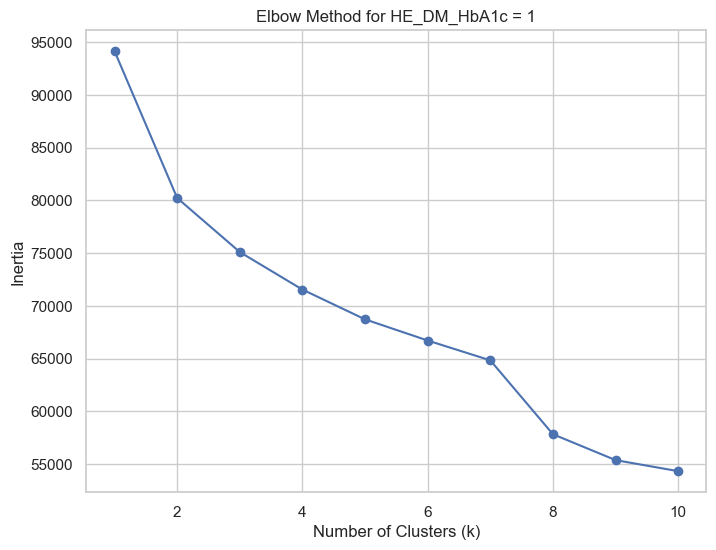

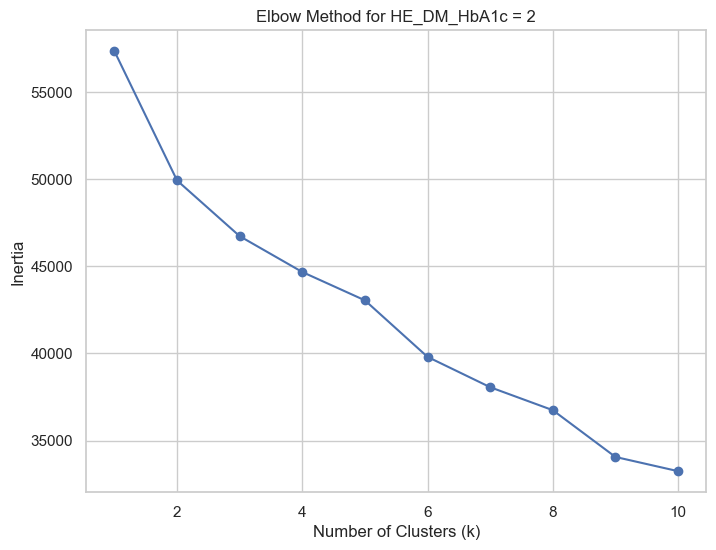

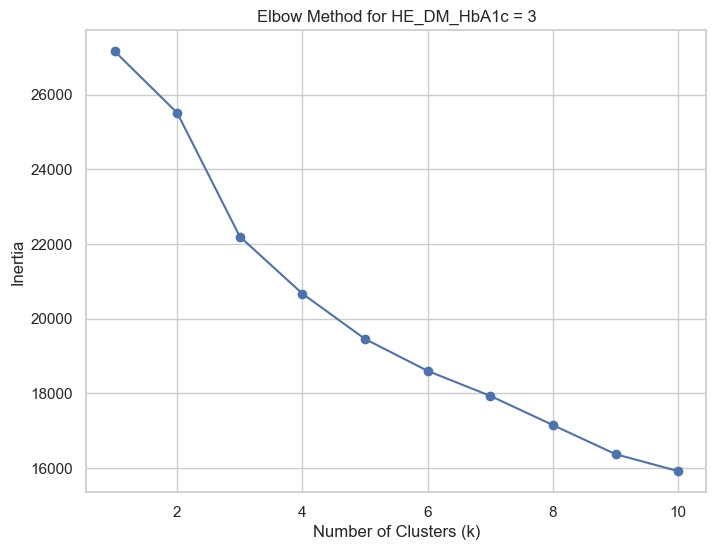

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 피처 표준화
scaler = StandardScaler()

# 클러스터 수 범위 설정 (예: 1~10)
k_range = range(1, 11)

# 결과를 저장할 데이터프레임 준비
df_clustering['Cluster'] = np.nan

selected_cols = knn_columns + ["BD1_11","tobacco","BE5_1","LS_VEG1"]

for HE_DM_HbA1c_value in [1, 2, 3, 4]:
    # HE_DM_HbA1c 값에 해당하는 데이터 추출
    HE_DM_HbA1c_df = df_clustering[df_clustering['HE_DM_HbA1c'] == HE_DM_HbA1c_value][selected_cols].copy()

    if not HE_DM_HbA1c_df.empty:
        # 데이터 표준화
        scaled_df = scaler.fit_transform(HE_DM_HbA1c_df)

        # 엘보우 방법: 각 k에 대해 관성(Inertia) 계산
        inertias = []
        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(scaled_df)
            inertias.append(kmeans.inertia_)

        # 엘보우 플롯 시각화
        plt.figure(figsize=(8, 6))
        plt.plot(k_range, inertias, marker='o')
        plt.title(f'Elbow Method for HE_DM_HbA1c = {HE_DM_HbA1c_value}')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Inertia')
        plt.grid(True)
        plt.show()

        # 최적 k 선택 (예: 관성 감소율 기반)
        # 여기서는 수동으로 플롯을 보고 k를 선택하거나, 자동화된 방법을 사용할 수 있음
        # 예: 관성 감소율이 완만해지는 k를 선택 (임시로 k=3으로 설정, 실제로는 플롯 확인 후 결정)
        optimal_k = 3  # TODO: 엘보우 플롯을 보고 직접 선택하거나 자동화 필요

        # 최적 k로 K-means 군집화 수행
        kmeans = KMeans(n_clusters=optimal_k, random_state=42)
        clusters = kmeans.fit_predict(scaled_df)

        # 클러스터 결과 저장
        df_clustering.loc[HE_DM_HbA1c_df.index, 'Cluster'] = clusters


--- Processing HE_DM_HbA1c = 1 with k = 2 ---
Silhouette Score for HE_DM_HbA1c = 1 (k=2): 0.1654
Cluster Characteristics (Mean values for HE_DM_HbA1c = 1, k=2):
             수축기 혈압 (최고 혈압)  이완기 혈압 (최저 혈압)       허리둘레         혈당     총 콜레스테롤  \
New_Cluster                                                                     
0                125.613987       78.250490  88.989399  91.597868  193.506610   
1                112.224045       70.547464  74.054145  88.831872  188.515654   

             HDL 콜레스테롤 (좋은 콜레스테롤)  LDL 콜레스테롤 (나쁜 콜레스테롤)  크레아티닌 (신장 기능 지표)  \
New_Cluster                                                                 
0                       52.233689            122.916418          0.869288   
1                       66.298998            112.551033          0.703607   

             AST (간 기능 검사, GOT)  ALT (간 기능 검사, GPT)         체중           키  \
New_Cluster                                                                  
0                     23.872154           25.412

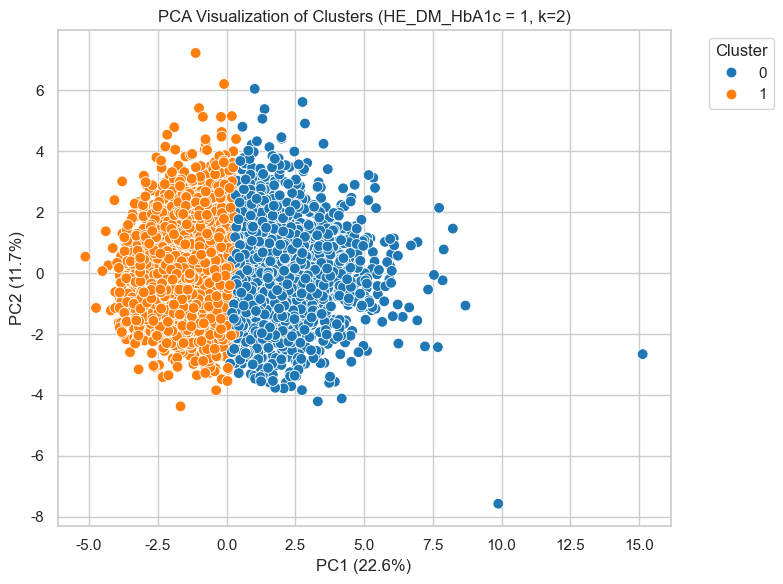


--- Processing HE_DM_HbA1c = 2 with k = 3 ---
Silhouette Score for HE_DM_HbA1c = 2 (k=3): 0.1510
Cluster Characteristics (Mean values for HE_DM_HbA1c = 2, k=3):
             수축기 혈압 (최고 혈압)  이완기 혈압 (최저 혈압)       허리둘레          혈당  \
New_Cluster                                                          
0                129.982993       80.962993  94.320871  105.512925   
1                122.229989       74.361273  81.221866  101.716289   
2                130.156000       77.768000  86.684800  103.680000   

                총 콜레스테롤  HDL 콜레스테롤 (좋은 콜레스테롤)  LDL 콜레스테롤 (나쁜 콜레스테롤)  \
New_Cluster                                                           
0            191.826531             49.336054            119.400000   
1            190.296656             59.560949            115.483279   
2            189.320000             51.860000            116.220000   

             크레아티닌 (신장 기능 지표)  AST (간 기능 검사, GOT)  ALT (간 기능 검사, GPT)  \
New_Cluster                                               

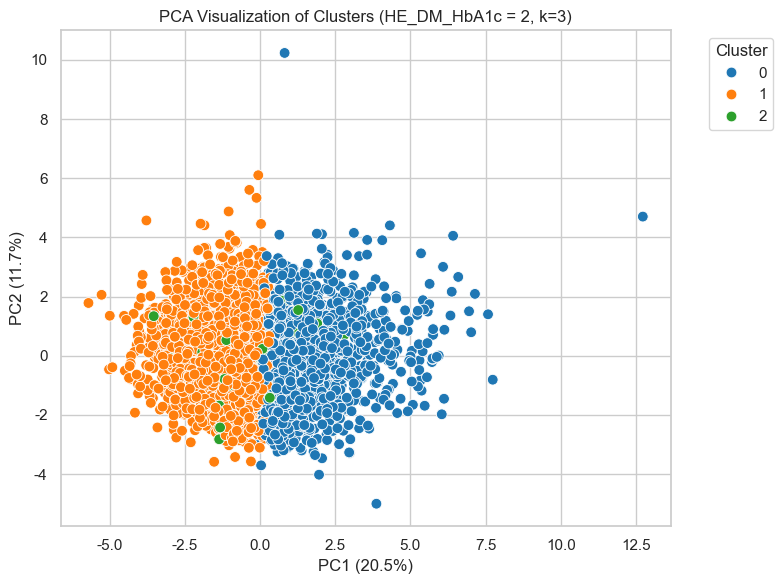


--- Processing HE_DM_HbA1c = 3 with k = 3 ---
Silhouette Score for HE_DM_HbA1c = 3 (k=3): 0.1511
Cluster Characteristics (Mean values for HE_DM_HbA1c = 3, k=3):
             수축기 혈압 (최고 혈압)  이완기 혈압 (최저 혈압)       허리둘레          혈당  \
New_Cluster                                                          
0                131.997143       80.329841  97.641048  142.504762   
1                125.633154       72.728525  84.955027  127.503767   
2                135.343590       78.594872  88.765128  143.871795   

                총 콜레스테롤  HDL 콜레스테롤 (좋은 콜레스테롤)  LDL 콜레스테롤 (나쁜 콜레스테롤)  \
New_Cluster                                                           
0            173.433333             47.198413            101.192063   
1            155.287406             53.236814             85.067815   
2            149.897436             50.717949             81.487179   

             크레아티닌 (신장 기능 지표)  AST (간 기능 검사, GOT)  ALT (간 기능 검사, GPT)  \
New_Cluster                                               

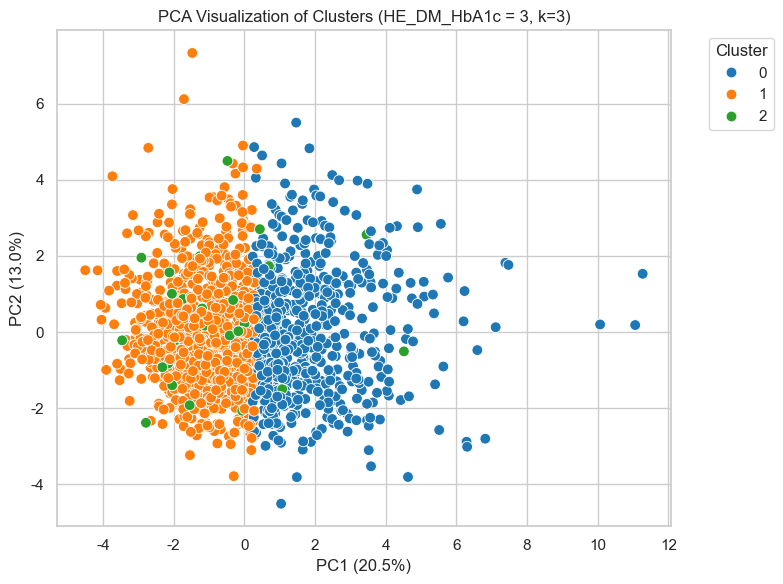

In [134]:
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd # pandas 필요
import matplotlib.pyplot as plt # matplotlib 필요
from sklearn.cluster import KMeans # KMeans 필요
# Assume df_clustering, selected_cols, scaler are defined and initialized before this snippet
from sklearn.metrics import silhouette_score


# 매핑 딕셔너리 정의 (피처 이름 -> 한글 설명)
feature_korean_names = {
    'HE_sbp1': '수축기 혈압 (최고 혈압)',
    'HE_dbp1': '이완기 혈압 (최저 혈압)',
    'HE_wc': '허리둘레',
    'HE_glu': '혈당',
    'HE_chol': '총 콜레스테롤',
    'HE_HDL_st2': 'HDL 콜레스테롤 (좋은 콜레스테롤)',
    'HE_LDL_drct': 'LDL 콜레스테롤 (나쁜 콜레스테롤)',
    'HE_crea': '크레아티닌 (신장 기능 지표)',
    'HE_ast': 'AST (간 기능 검사, GOT)',
    'HE_alt': 'ALT (간 기능 검사, GPT)',
    'HE_wt': '체중',
    'HE_ht': '키',
    'HE_BMI': '체질량 지수 (BMI)',
    'BD1_11': '1년 간 음주 빈도',
    'tobacco': '하루평균 흡연량',
    'BE5_1' : '1주일 간 운동 횟수',
    'LS_VEG1': '1년 동안 평균 채소류 섭취 빈도'
}

# 시각화용 설정
sns.set(style="whitegrid")

# HE_DM_HbA1c 별로 반복
for HE_DM_HbA1c_value, optimal_k in zip([1, 2, 3], [2, 3, 3]):
    print(f"\n--- Processing HE_DM_HbA1c = {HE_DM_HbA1c_value} with k = {optimal_k} ---")

    # 해당 그룹 데이터 추출
    # selected_cols는 이전에 정의되어 있어야 함 (예: selected_cols = ['HE_sbp1', '...', 'LS_VEG1'])
    # df_clustering는 이전에 로드/처리되어 있어야 함
    # scaler는 이전에 fit 되어 있어야 함
    HE_DM_HbA1c_df = df_clustering[df_clustering['HE_DM_HbA1c'] == HE_DM_HbA1c_value][selected_cols].copy()
    # 이 변수는 현재 코드 플로우에서 직접 사용되지 않습니다. (기존 클러스터 라벨)
    # cluster_labels = df_clustering[df_clustering['HE_HP'] == hp_value]['Cluster']


    if not HE_DM_HbA1c_df.empty:
        # 표준화
        scaled_df = scaler.fit_transform(HE_DM_HbA1c_df)

        # ====== 여기에서 optimal_k 값을 사용하여 클러스터링 수행 ======
        # K-Means 예시
        # n_init='auto' 또는 숫자로 지정 (최신 sklearn 버전 권장)
        kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
        new_cluster_labels = kmeans.fit_predict(scaled_df)
        # =======================================================
        kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
        new_cluster_labels = kmeans.fit_predict(scaled_df)
        # =======================================================
        if optimal_k > 1 and scaled_df.shape[0] > 1: # 데이터 포인트가 1개보다 많아야 계산 가능
                silhouette_avg = silhouette_score(scaled_df, new_cluster_labels)
                print(f"Silhouette Score for HE_DM_HbA1c = {HE_DM_HbA1c_value} (k={optimal_k}): {silhouette_avg:.4f}")
        else:
            if optimal_k <= 1:
                print(f"Silhouette Score cannot be calculated for k = {optimal_k} (must be > 1).")
            else: # scaled_df.shape[0] <= 1
                 print(f"Silhouette Score cannot be calculated for HE_DM_HbA1c = {HE_DM_HbA1c_value}: Insufficient data points ({scaled_df.shape[0]}).")

        # 군집별 특징 계산 및 출력
        # 1. 원본 데이터프레임에 새로 생성된 클러스터 라벨 추가
        # 인덱스가 맞아야 함 (위에서 같은 필터링 기준으로 슬라이싱했으므로 일치한다고 가정)
        HE_DM_HbA1c_with_labels = HE_DM_HbA1c_df.copy() # 원본 hp_df 변경 방지를 위해 복사
        HE_DM_HbA1c_with_labels['New_Cluster'] = new_cluster_labels

        # 2. 'New_Cluster' 기준으로 그룹화하고 각 피처의 평균 계산
        cluster_characteristics = HE_DM_HbA1c_with_labels.groupby('New_Cluster')[selected_cols].mean()

        # 3. 결과 출력을 위해 컬럼 이름을 한글로 변경
        # selected_cols에 포함된 피처 이름만 매핑 (딕셔너리에 없는 컬럼은 원래 이름 유지)
        cols_to_rename = {col: feature_korean_names.get(col, col) for col in cluster_characteristics.columns}
        cluster_characteristics = cluster_characteristics.rename(columns=cols_to_rename)

        # 4. 결과 출력
        print(f"Cluster Characteristics (Mean values for HE_DM_HbA1c = {HE_DM_HbA1c_value}, k={optimal_k}):")
        print(cluster_characteristics)
        print("-" * 60) # 구분선

        # 클러스터 라벨 변수 이름을 new_cluster_labels로 변경 (혼동 방지)
        cluster_labels_for_pca = new_cluster_labels

        # PCA 2차원 축소
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(scaled_df)

        # 결과를 데이터프레임으로 변환
        pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
        # 새로 생성된 클러스터 라벨 사용
        pca_df['Cluster'] = cluster_labels_for_pca.astype(int)

        # 시각화 (나머지 코드 동일) - PCA 플롯의 축 이름은 PC1, PC2로 유지
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60)
        plt.title(f'PCA Visualization of Clusters (HE_DM_HbA1c = {HE_DM_HbA1c_value}, k={optimal_k})') # 제목에 k값 추가
        plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
        plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
        plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

비만

In [135]:
# HE_obe 결측치 행 제거
df_clustering = df.dropna(subset=['HE_obe'])

columns_to_drop = ['occp', 'HE_Ualb', 'HE_HTG', 'HE_HCHOL', 'HE_fh', 'HE_DMfh1', 'HE_DMfh2',
                   'HE_HPfh1', 'HE_HPfh2', 'HE_HLfh1', 'HE_HLfh2']
df_clustering = df_clustering.drop(columns=columns_to_drop, errors='ignore')

low_missing_columns = [
    'BE5_1','BD1_11', 'LS_VEG1', 'tobacco'
]

In [136]:
# 이전에 low_missing_columns, df_clustering가 정의되었다고 가정합니다.

low_missing_columns = [
 'BE5_1','BD1_11', 'LS_VEG1', 'tobacco'
]

print("--- Checking and filling NaNs ---")
print("Initial NaN count for specified columns:")
print(df_clustering[low_missing_columns].isnull().sum())
print("-" * 30)

# NaN을 각 컬럼의 최빈값으로 df_clustering에서 대체
for col in low_missing_columns:
    print(f"\nProcessing column: '{col}'")
    if col not in df_clustering.columns:
        print(f"Warning: Column '{col}' not found in the DataFrame.")
        continue # 다음 컬럼으로 넘어감

    initial_nan_count = df_clustering[col].isnull().sum()
    print(f"  NaN count before filling: {initial_nan_count}")

    mode_value = df_clustering[col].mode(dropna=True)

    if not mode_value.empty:
        fill_value = mode_value[0]
        print(f"  Calculated mode value: {fill_value} (Type: {type(fill_value)})")

        # 실제로 NaN이 있는 경우에만 fillna 시도
        if initial_nan_count > 0:
             df_clustering[col].fillna(fill_value, inplace=True)
             print(f"  Filled {initial_nan_count} NaN values with {fill_value}.")
        else:
             print(f"  No NaN values found to fill in '{col}'.")

        final_nan_count = df_clustering[col].isnull().sum()
        print(f"  NaN count after filling: {final_nan_count}")

        # 만약 final_nan_count가 0이 아니라면, 채워지지 않은 NaN이 있다는 뜻
        if final_nan_count > 0:
            print(f"  Note: {final_nan_count} NaN values remain in '{col}'. They might not be standard np.nan.")

    else:
        print(f"  Could not determine mode for '{col}' (column might be all NaNs or empty after dropna). No filling performed.")
        print(f"  NaN count after check: {df_clustering[col].isnull().sum()}")


print("\n--- Filling process finished ---")
print("Final NaN count for specified columns:")
print(df_clustering[low_missing_columns].isnull().sum())

# 추가 확인: NaN이 아닌 다른 형태의 누락된 값 확인 (예: 빈 문자열 '')
print("\n--- Checking for other potential missing value representations ---")
for col in low_missing_columns:
     if df_clustering[col].dtype == 'object': # 문자열 타입 컬럼인 경우
         print(f"Checking column '{col}' (object dtype):")
         # 빈 문자열 또는 'NA' 등 의심스러운 값의 개수를 세어봅니다.
         print(f"  Count of empty strings (''): {df_clustering[col].eq('').sum()}")
         # 다른 일반적이지 않은 값들을 value_counts로 확인
         print("  Top values (including non-standard):")
         print(df_clustering[col].value_counts(dropna=False).head()) # dropna=False 포함

--- Checking and filling NaNs ---
Initial NaN count for specified columns:
BE5_1      899
BD1_11     179
LS_VEG1    453
tobacco      0
dtype: int64
------------------------------

Processing column: 'BE5_1'
  NaN count before filling: 899
  Calculated mode value: 0.0 (Type: <class 'numpy.float64'>)
  Filled 899 NaN values with 0.0.
  NaN count after filling: 0

Processing column: 'BD1_11'
  NaN count before filling: 179
  Calculated mode value: 0.0 (Type: <class 'numpy.float64'>)
  Filled 179 NaN values with 0.0.
  NaN count after filling: 0

Processing column: 'LS_VEG1'
  NaN count before filling: 453
  Calculated mode value: 730.0 (Type: <class 'numpy.float64'>)
  Filled 453 NaN values with 730.0.
  NaN count after filling: 0

Processing column: 'tobacco'
  NaN count before filling: 0
  Calculated mode value: 0.0 (Type: <class 'numpy.float64'>)
  No NaN values found to fill in 'tobacco'.
  NaN count after filling: 0

--- Filling process finished ---
Final NaN count for specified colu

In [137]:
            
knn_columns = [
    'HE_sbp1', 'HE_dbp1', 'HE_wc', 'HE_glu',
    'HE_chol', 'HE_HDL_st2', 'HE_LDL_drct', 'HE_crea',
    'HE_ast', 'HE_alt', 'HE_wt', 'HE_ht', 'HE_BMI'
]

from sklearn.impute import KNNImputer

# HE_obe별로 데이터 분리 및 KNN Imputation
for HE_obe_value in [1, 2, 3, 4, 5, 6 ]:
    # HE_obe 값에 해당하는 데이터 추출
    HE_obe_df = df_clustering[df_clustering['HE_obe'] == HE_obe_value][knn_columns].copy()
    if not HE_obe_df.empty:
        # 비해당/모름 값 NaN으로 변환
        HE_obe_df = HE_obe_df.replace([888, 999], np.nan)
        # KNN Imputation
        imputer = KNNImputer(n_neighbors=5, weights="uniform")
        HE_obe_imputed = imputer.fit_transform(HE_obe_df)
        HE_obe_imputed_df = pd.DataFrame(HE_obe_imputed, columns=knn_columns, index=HE_obe_df.index)
        # 원본 데이터에 반영
        df_clustering.loc[HE_obe_df.index, knn_columns] =  HE_obe_imputed_df


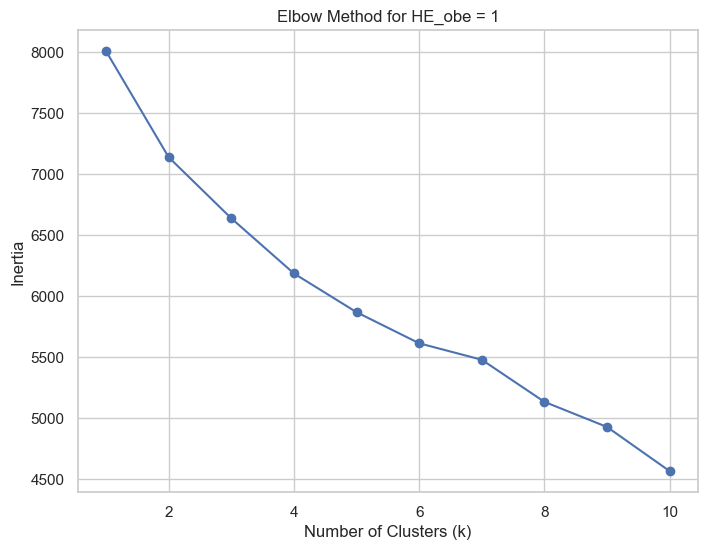

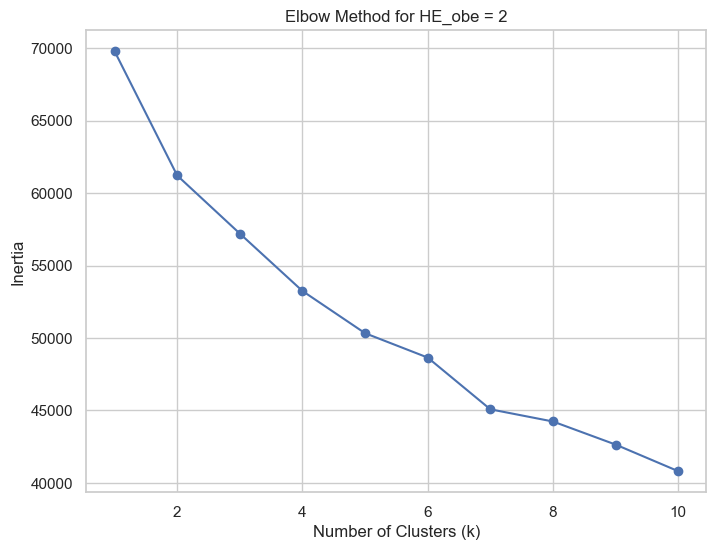

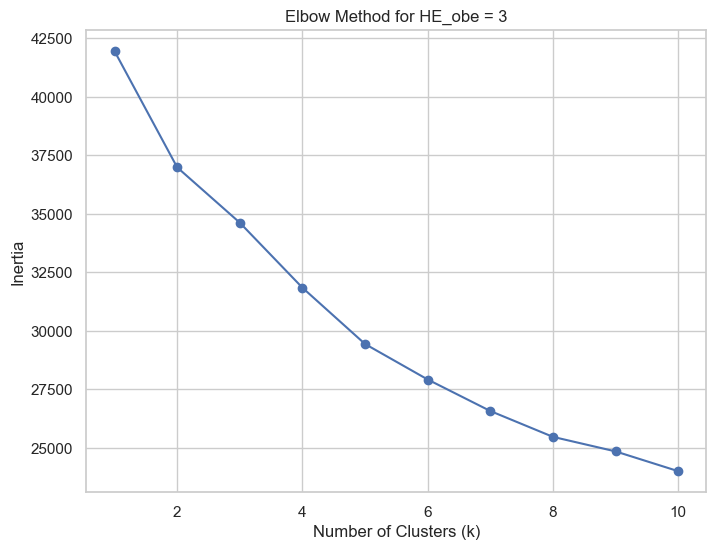

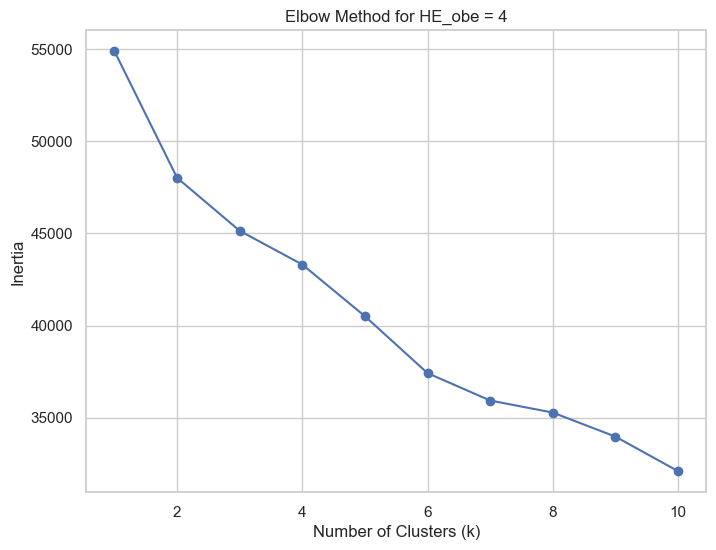

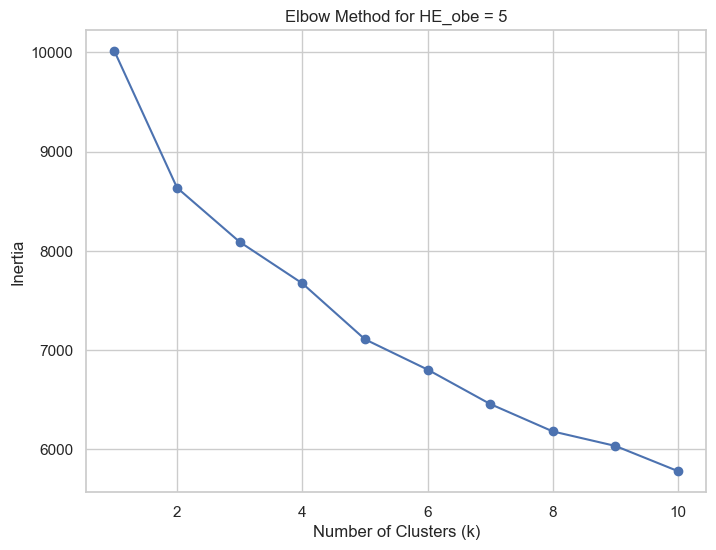

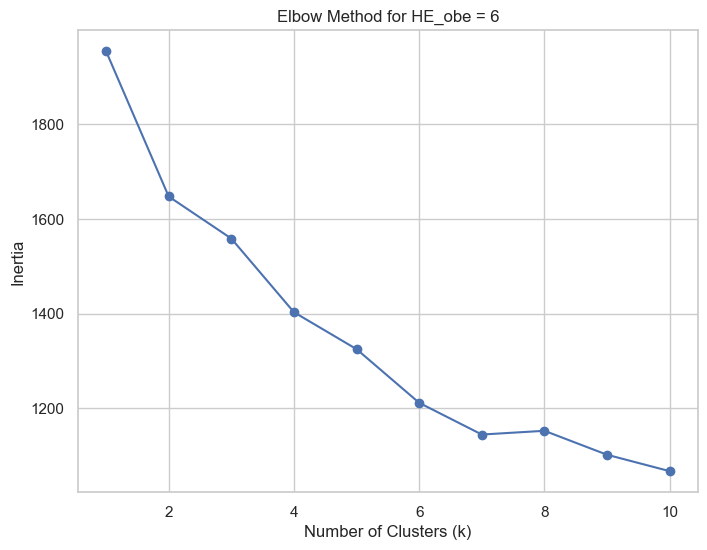

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 피처 표준화
scaler = StandardScaler()

# 클러스터 수 범위 설정 (예: 1~10)
k_range = range(1, 11)

# 결과를 저장할 데이터프레임 준비
df_clustering['Cluster'] = np.nan

selected_cols = knn_columns + ["BD1_11","tobacco","BE5_1","LS_VEG1"]

for HE_obe_value in [1, 2, 3, 4, 5, 6]:
    # HE_obe 값에 해당하는 데이터 추출
    HE_obe_df = df_clustering[df_clustering['HE_obe'] == HE_obe_value][selected_cols].copy()

    if not HE_obe_df.empty:
        # 데이터 표준화
        scaled_df = scaler.fit_transform(HE_obe_df)

        # 엘보우 방법: 각 k에 대해 관성(Inertia) 계산
        inertias = []
        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(scaled_df)
            inertias.append(kmeans.inertia_)

        # 엘보우 플롯 시각화
        plt.figure(figsize=(8, 6))
        plt.plot(k_range, inertias, marker='o')
        plt.title(f'Elbow Method for HE_obe = {HE_obe_value}')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Inertia')
        plt.grid(True)
        plt.show()

        # 최적 k 선택 (예: 관성 감소율 기반)
        # 여기서는 수동으로 플롯을 보고 k를 선택하거나, 자동화된 방법을 사용할 수 있음
        # 예: 관성 감소율이 완만해지는 k를 선택 (임시로 k=3으로 설정, 실제로는 플롯 확인 후 결정)
        optimal_k = 3  # TODO: 엘보우 플롯을 보고 직접 선택하거나 자동화 필요

        # 최적 k로 K-means 군집화 수행
        kmeans = KMeans(n_clusters=optimal_k, random_state=42)
        clusters = kmeans.fit_predict(scaled_df)

        # 클러스터 결과 저장
        df_clustering.loc[HE_obe_df.index, 'Cluster'] = clusters


--- Processing HE_obe = 1 with k = 3 ---
Silhouette Score for HE_obe = 1 (k=3): 0.1114
Cluster Characteristics (Mean values for HE_obe = 1, k=3):
             수축기 혈압 (최고 혈압)  이완기 혈압 (최저 혈압)       허리둘레         혈당     총 콜레스테롤  \
New_Cluster                                                                     
0                105.495319       66.729362  64.654638  88.329362  190.771064   
1                114.843609       71.255639  69.975940  96.679699  163.966917   
2                122.803883       75.706796  62.961748  94.800000  190.518447   

             HDL 콜레스테롤 (좋은 콜레스테롤)  LDL 콜레스테롤 (나쁜 콜레스테롤)  크레아티닌 (신장 기능 지표)  \
New_Cluster                                                                 
0                       71.688511            111.700426          0.672153   
1                       62.427068             91.879699          0.860391   
2                       75.060194            105.867961          0.703883   

             AST (간 기능 검사, GOT)  ALT (간 기능 검사, GPT)         체

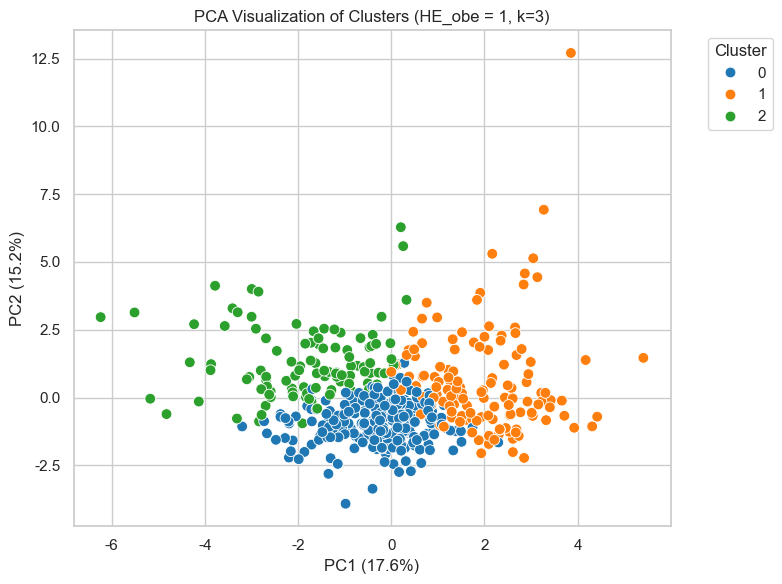


--- Processing HE_obe = 2 with k = 3 ---
Silhouette Score for HE_obe = 2 (k=3): 0.1231
Cluster Characteristics (Mean values for HE_obe = 2, k=3):
             수축기 혈압 (최고 혈압)  이완기 혈압 (최저 혈압)       허리둘레          혈당  \
New_Cluster                                                          
0                132.176976       79.156529  77.694433  102.106701   
1                106.755829       67.925015  71.327053   90.947862   
2                120.365668       74.634980  81.320615  101.432713   

                총 콜레스테롤  HDL 콜레스테롤 (좋은 콜레스테롤)  LDL 콜레스테롤 (나쁜 콜레스테롤)  \
New_Cluster                                                           
0            189.140034             60.392612            113.475945   
1            192.194845             68.658465            114.808084   
2            175.937166             54.715789            105.758866   

             크레아티닌 (신장 기능 지표)  AST (간 기능 검사, GOT)  ALT (간 기능 검사, GPT)  \
New_Cluster                                                             


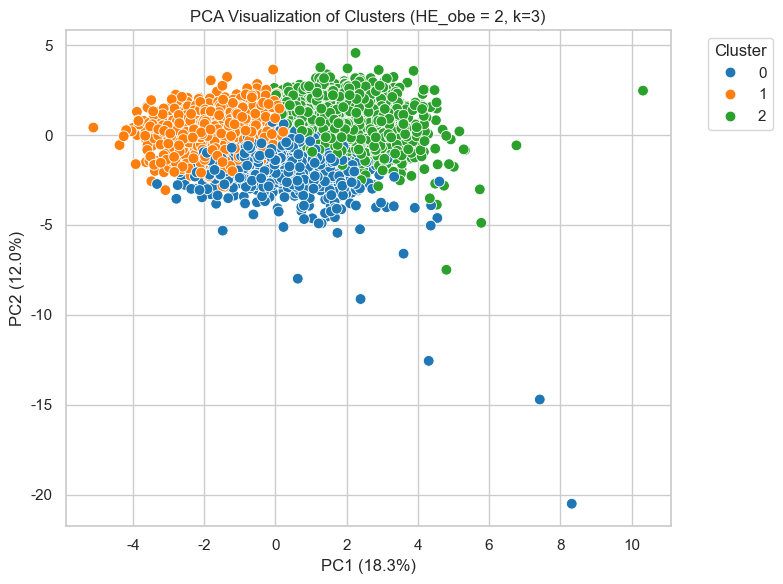


--- Processing HE_obe = 3 with k = 3 ---
Silhouette Score for HE_obe = 3 (k=3): 0.1118
Cluster Characteristics (Mean values for HE_obe = 3, k=3):
             수축기 혈압 (최고 혈압)  이완기 혈압 (최저 혈압)       허리둘레          혈당  \
New_Cluster                                                          
0                127.810904       74.901578  85.993802  111.614347   
1                117.307403       73.315801  81.041348   94.800000   
2                125.366051       78.698845  87.541339  100.433487   

                총 콜레스테롤  HDL 콜레스테롤 (좋은 콜레스테롤)  LDL 콜레스테롤 (나쁜 콜레스테롤)  \
New_Cluster                                                           
0            149.946628             53.072597             80.547489   
1            209.296133             62.065856            133.366630   
2            194.794919             51.457737            122.671594   

             크레아티닌 (신장 기능 지표)  AST (간 기능 검사, GOT)  ALT (간 기능 검사, GPT)  \
New_Cluster                                                             


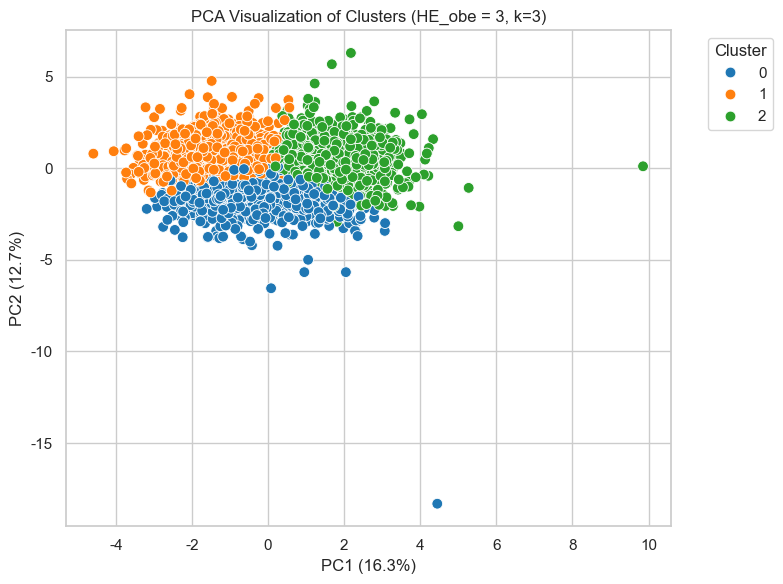


--- Processing HE_obe = 4 with k = 2 ---
Silhouette Score for HE_obe = 4 (k=2): 0.1343
Cluster Characteristics (Mean values for HE_obe = 4, k=2):
             수축기 혈압 (최고 혈압)  이완기 혈압 (최저 혈압)       허리둘레          혈당  \
New_Cluster                                                          
0                128.256585       80.056963  94.736131  108.431758   
1                124.536137       74.861182  88.595637  102.805728   

                총 콜레스테롤  HDL 콜레스테롤 (좋은 콜레스테롤)  LDL 콜레스테롤 (나쁜 콜레스테롤)  \
New_Cluster                                                           
0            188.792439             47.837051            117.072086   
1            183.531140             55.738574            111.203656   

             크레아티닌 (신장 기능 지표)  AST (간 기능 검사, GOT)  ALT (간 기능 검사, GPT)  \
New_Cluster                                                             
0                    0.940158           26.636547           31.937492   
1                    0.717205           22.092992           20.41011

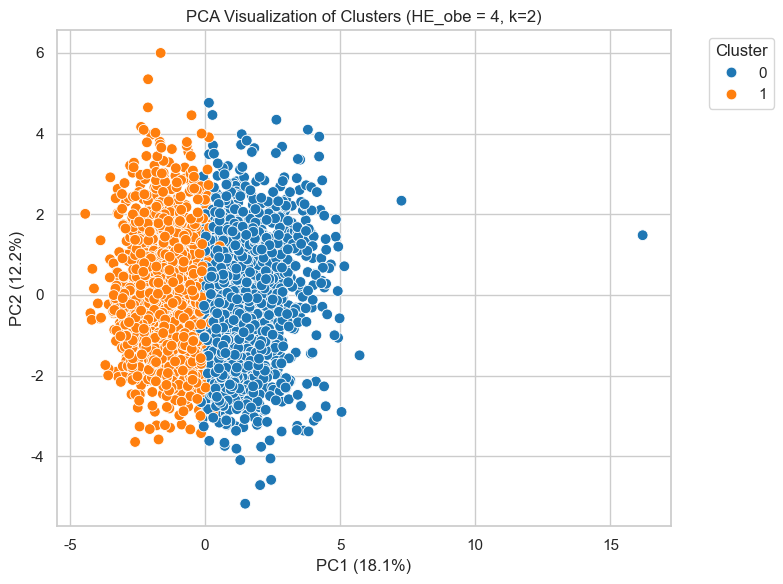


--- Processing HE_obe = 5 with k = 3 ---
Silhouette Score for HE_obe = 5 (k=3): 0.1384
Cluster Characteristics (Mean values for HE_obe = 5, k=3):
             수축기 혈압 (최고 혈압)  이완기 혈압 (최저 혈압)        허리둘레          혈당  \
New_Cluster                                                           
0                132.923077       83.346154  104.259231  115.538462   
1                126.892086       79.573381  105.429496  112.495683   
2                127.266667       76.823158   98.447158  104.948772   

                총 콜레스테롤  HDL 콜레스테롤 (좋은 콜레스테롤)  LDL 콜레스테롤 (나쁜 콜레스테롤)  \
New_Cluster                                                           
0            233.423077             48.115385            155.038462   
1            185.857554             44.087050            118.033094   
2            184.571930             55.114386            112.027368   

             크레아티닌 (신장 기능 지표)  AST (간 기능 검사, GOT)  ALT (간 기능 검사, GPT)  \
New_Cluster                                                         

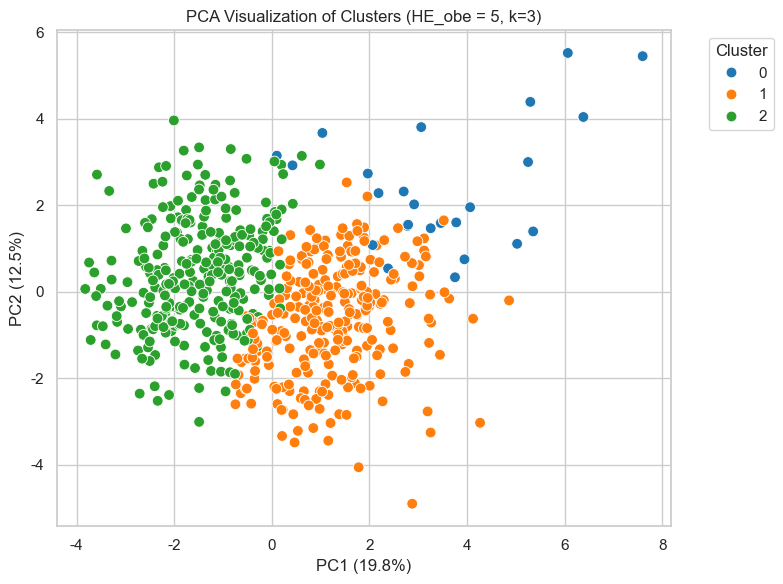


--- Processing HE_obe = 6 with k = 2 ---
Silhouette Score for HE_obe = 6 (k=2): 0.1485
Cluster Characteristics (Mean values for HE_obe = 6, k=2):
             수축기 혈압 (최고 혈압)  이완기 혈압 (최저 혈압)        허리둘레          혈당  \
New_Cluster                                                           
0                136.779661       85.355932  115.567458  102.779661   
1                127.982143       77.007143  107.569643  106.260714   

                총 콜레스테롤  HDL 콜레스테롤 (좋은 콜레스테롤)  LDL 콜레스테롤 (나쁜 콜레스테롤)  \
New_Cluster                                                           
0            200.284746             45.881356            129.528814   
1            177.192857             53.907143            106.960714   

             크레아티닌 (신장 기능 지표)  AST (간 기능 검사, GOT)  ALT (간 기능 검사, GPT)  \
New_Cluster                                                             
0                    0.900712           31.535593           50.776271   
1                    0.663679           22.785714           24.4

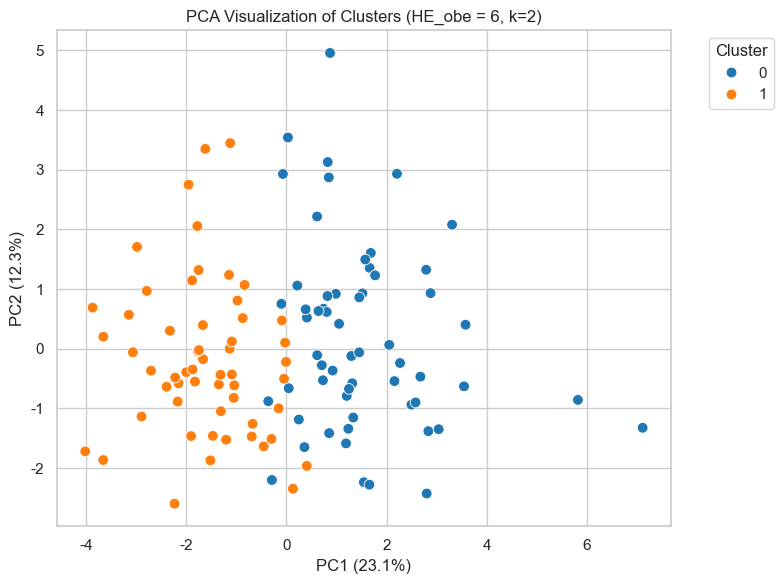

In [139]:
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd # pandas 필요
import matplotlib.pyplot as plt # matplotlib 필요
from sklearn.cluster import KMeans # KMeans 필요
# Assume df_clustering, selected_cols, scaler are defined and initialized before this snippet
from sklearn.metrics import silhouette_score


# 매핑 딕셔너리 정의 (피처 이름 -> 한글 설명)
feature_korean_names = {
    'HE_sbp1': '수축기 혈압 (최고 혈압)',
    'HE_dbp1': '이완기 혈압 (최저 혈압)',
    'HE_wc': '허리둘레',
    'HE_glu': '혈당',
    'HE_chol': '총 콜레스테롤',
    'HE_HDL_st2': 'HDL 콜레스테롤 (좋은 콜레스테롤)',
    'HE_LDL_drct': 'LDL 콜레스테롤 (나쁜 콜레스테롤)',
    'HE_crea': '크레아티닌 (신장 기능 지표)',
    'HE_ast': 'AST (간 기능 검사, GOT)',
    'HE_alt': 'ALT (간 기능 검사, GPT)',
    'HE_wt': '체중',
    'HE_ht': '키',
    'HE_BMI': '체질량 지수 (BMI)',
    'BD1_11': '1년 간 음주 빈도',
    'tobacco': '하루평균 흡연량',
    'BE5_1' : '1주일 간 운동 횟수',
    'LS_VEG1': '1년 동안 평균 채소류 섭취 빈도'
}

# 시각화용 설정
sns.set(style="whitegrid")

# HE_obe 별로 반복
for HE_obe_value, optimal_k in zip([1, 2, 3, 4, 5, 6], [3, 3, 3, 2, 3, 2]):
    print(f"\n--- Processing HE_obe = {HE_obe_value} with k = {optimal_k} ---")

    # 해당 그룹 데이터 추출
    # selected_cols는 이전에 정의되어 있어야 함 (예: selected_cols = ['HE_sbp1', '...', 'LS_VEG1'])
    # df_clustering는 이전에 로드/처리되어 있어야 함
    # scaler는 이전에 fit 되어 있어야 함
    HE_obe_df = df_clustering[df_clustering['HE_obe'] == HE_obe_value][selected_cols].copy()
    # 이 변수는 현재 코드 플로우에서 직접 사용되지 않습니다. (기존 클러스터 라벨)
    # cluster_labels = df_clustering[df_clustering['HE_HP'] == HE_obe_value]['Cluster']


    if not HE_obe_df.empty:
        # 표준화
        scaled_df = scaler.fit_transform(HE_obe_df)

        # ====== 여기에서 optimal_k 값을 사용하여 클러스터링 수행 ======
        # K-Means 예시
        # n_init='auto' 또는 숫자로 지정 (최신 sklearn 버전 권장)
        kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
        new_cluster_labels = kmeans.fit_predict(scaled_df)
        # =======================================================
        kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
        new_cluster_labels = kmeans.fit_predict(scaled_df)
        # =======================================================
        if optimal_k > 1 and scaled_df.shape[0] > 1: # 데이터 포인트가 1개보다 많아야 계산 가능
                silhouette_avg = silhouette_score(scaled_df, new_cluster_labels)
                print(f"Silhouette Score for HE_obe = {HE_obe_value} (k={optimal_k}): {silhouette_avg:.4f}")
        else:
            if optimal_k <= 1:
                print(f"Silhouette Score cannot be calculated for k = {optimal_k} (must be > 1).")
            else: # scaled_df.shape[0] <= 1
                 print(f"Silhouette Score cannot be calculated for HE_obe = {HE_obe_value}: Insufficient data points ({scaled_df.shape[0]}).")

        # 군집별 특징 계산 및 출력
        # 1. 원본 데이터프레임에 새로 생성된 클러스터 라벨 추가
        # 인덱스가 맞아야 함 (위에서 같은 필터링 기준으로 슬라이싱했으므로 일치한다고 가정)
        HE_obe_df_with_labels = HE_obe_df.copy() # 원본 HE_obe_df 변경 방지를 위해 복사
        HE_obe_df_with_labels['New_Cluster'] = new_cluster_labels

        # 2. 'New_Cluster' 기준으로 그룹화하고 각 피처의 평균 계산
        cluster_characteristics = HE_obe_df_with_labels.groupby('New_Cluster')[selected_cols].mean()

        # 3. 결과 출력을 위해 컬럼 이름을 한글로 변경
        # selected_cols에 포함된 피처 이름만 매핑 (딕셔너리에 없는 컬럼은 원래 이름 유지)
        cols_to_rename = {col: feature_korean_names.get(col, col) for col in cluster_characteristics.columns}
        cluster_characteristics = cluster_characteristics.rename(columns=cols_to_rename)

        # 4. 결과 출력
        print(f"Cluster Characteristics (Mean values for HE_obe = {HE_obe_value}, k={optimal_k}):")
        print(cluster_characteristics)
        print("-" * 60) # 구분선

        # 클러스터 라벨 변수 이름을 new_cluster_labels로 변경 (혼동 방지)
        cluster_labels_for_pca = new_cluster_labels

        # PCA 2차원 축소
        pca = PCA(n_components=2)
        pca_result = pca.fit_transform(scaled_df)

        # 결과를 데이터프레임으로 변환
        pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
        # 새로 생성된 클러스터 라벨 사용
        pca_df['Cluster'] = cluster_labels_for_pca.astype(int)

        # 시각화 (나머지 코드 동일) - PCA 플롯의 축 이름은 PC1, PC2로 유지
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', s=60)
        plt.title(f'PCA Visualization of Clusters (HE_obe = {HE_obe_value}, k={optimal_k})') # 제목에 k값 추가
        plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
        plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
        plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()